<div>
    <img src="http://www.ient.rwth-aachen.de/cms/uploads/images/rwth_ient_logo@2x.png" style="float: right;height: 5em;">
</div>

# Befehlsreferenz

## Allgemeines

__[~](https://stackoverflow.com/questions/8305199/the-tilde-operator-in-python)__: Pythons "Nicht"-Operator

## Numpy-Arrays

__[np.astype()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html)__: Ändert den Datentyp der Einträge eines Numpy-Arrays.

__[np.ravel()](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)__: Reiht alle Einträge eines n-dimensionales Array in einen Vektor (1D-Array) auf.

__[np.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)__: Summiert die Elemente eines Arrays entlang einer Achse.

__[np.zeros()](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)__: Erstellt ein Numpy-Array indem alle Einträge 0 sind. Beispiel: *array = np.zeros((2,3))* erzeugt ein Array der Dimension $2\times 3$.

## Bildverarbeitung

__[binary_erosion()](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_erosion)__: Führt eine Erosion auf einem Binärbild aus.

__[binary_dilation()](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_dilation)__: Führt eine Dilatation auf einem Binärbild aus.

__[binary_fill_holes()](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray)__: Schließt Löcher in einem Binärbild.

__[disk()](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk)__: Erstellt ein Strukturelement der Form 'Kreis'

__[label()](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label)__:  Findet zusammenhängende Gebiete in einem übergebenen Binärbild und nummeriert diese durch.

__[regionprops()](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops)__: Berechnet die charakteristischen Eigenschaften von erkannten Objekten in einem Labelbild. Ein Beispiel folgt weiter unten.

__[rgb2gray()](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray)__: Errechnet die Helligkeit jedes Pixels aus einem RGB-Bildern.

__[square()](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.square)__: Erstellt ein Strukturelement der Form 'Quadrat'.
 
__[threshold_otsu()](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu)__: Berechnet die Binarisierungsgrenze eines Graustufenbildes nach der Methode von Otsu.

## Darstellung von Graphen, Plots, Bildern:

__[imread()](https://scikit-image.org/docs/dev/api/skimage.io.html)__: Liest ein Bild von einem gegebenen Pfad ein

__[imshow()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html)__: Zeigt das übergebene Bild an

__[axis.hist()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html)__: Berechnet und plottet das Histogramm eines Bildes in ein gegebenes Koordinatensystem *axis*, bspw. *ax.hist()*


## regionprops() Beispiel:

Lade ein Bild...

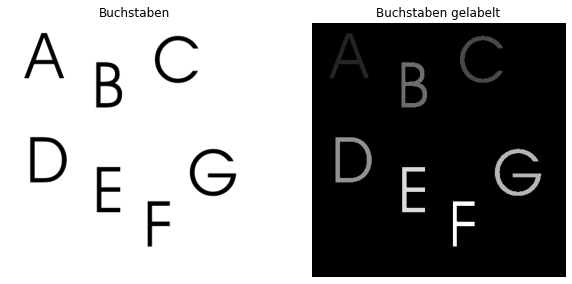

In [36]:
# Lade nötige Bibliotheken
import matplotlib.pyplot as plt
from skimage.morphology import label
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import regionprops
# Lade Bild und verarbeite es
img = imread('Bilder/Buchstaben_Teil2.bmp')
img_gray = rgb2gray(img)
img_bin = img_gray > threshold_otsu(img_gray)
img_inv = ~img_bin
img_labeled = label(img_inv)

# Plotte Bild
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img, cmap='gray');
ax[0].set_axis_off();
ax[0].set_title('Buchstaben');
ax[1].imshow(img_labeled, cmap='gray');
ax[1].set_axis_off();
ax[1].set_title('Buchstaben gelabelt');

Verwende regionrops(), um charakteristische Eigenschaften des Bildes zu extrahieren...

In [30]:
regions = regionprops(img_labeled)

Diese Funktion gibt eine Liste mit Eigenschaften jedes gelabelten Gebiets zurück

In [38]:
type(regions)

list

Die Länge der Liste, also _regions_ gibt an, wie viele zusammenhängende Gebiete im Bild gefunden wurden, hier also 5...

In [32]:
print(len(regions))

7


Um auf die Eigenschaften eines bestimmten erkannten Gebiets innerhalb des Bildes zuzugreifen, hier zum Beispiel auf das erste erkannte Gebiet, greift man auf die Liste _regions_ zu.

In [44]:
regions[0]

Um nun eine konkrete Eigenschaft des gewählten Objektes zuzugreifen, wird der Punkt-Operator verwendet.
Hier wird zum Beispiel auf die Bounding-Box-Koordinaten des erkannten Objektes zugegriffen.

In [46]:
minr, minc, maxr, maxc = regions[0].bbox # speichere die 4 zurückgegebenen Koordinaten der Bounding-Box
print(regions[0].bbox)

(16, 27, 87, 90)
